<html>
    <head>
    </head>
    <body>
        <table style="width:100%;text-align:center;">
          <tr>
              <th style="border-top-width:thick;border-top:solid;border-top-color:#15A0D1;width:20%;font-size:140%;text-align:center;color:#15A0D1;background-color:#E6F4F9;">Asignatura
              </th>
              <th style="border-width:1px;border:solid;border-color:#15A0D1;width:60%;font-size:140%;text-align:center;color:#15A0D1;background-color:#E6F4F9;">Datos de alumnos/profesores
              </th>
              <th style="border-top-width:thick;border-top:solid;border-top-color:#15A0D1;font-size:140%;text-align:center;color:#15A0D1;background-color:#E6F4F9;">Fecha
              </th>
          </tr>
          <tr>
              <th rowspan="2" style="border-bottom-width:thick;border-bottom:solid;border-bottom-color:#15A0D1;border-top-width:thick;border-top:solid;border-top-color:#15A0D1;width:20%;font-size:140%;text-align:center;">
                  <b>Percepción Computacional</b>
              </th>
              <td style="border-width:1px;border:solid;border-color:#15A0D1;width:60%;font-size:125%;text-align:left;">Alumnos: José María Zazo Martín, Federico Damián Estébanez y Adoración Fernández Miranda</td>
              <td rowspan="2" style="border-bottom-width:thick;border-bottom:solid;border-bottom-color:#15A0D1;border-top-width:thick;border-top:solid;border-top-color:#15A0D1;vertical-align:middle;font-size:125%;text-align:center;">12/06/2019
              </td>
          </tr>
          <tr>
              <td style="border-width:1px;border:solid;border-color:#15A0D1;width:60%;font-size:125%;text-align:left;">Profesores: Alberto de Santos Sierra y José Víctor Marco Martín</td>
          </tr>
        </table>
    </body>
</html>


## Laboratorio: Contornos activos.


### Objetivos

El objetivo es hacer uso de librerías ya implementadas sobre contornos activos y aplicarlo a imágenes reales.


### Descripción

La descripción del ejercicio es muy sencilla.

Haciendo uso de las librerías implementadas en Scikit Image para contornos activos, realiza la **segmentación de tres imágenes.**

<html>
    <head>
    </head>
    <body>
        <table style="width:100%;text-align:center;">
            <tr>
                <th>
                    <img src="tema10_act1a.png" alt="drawing" width="350"/>
                </th>
                <th>
                    <img src="tema10_act1b.png" alt="drawing" width="350"/>
                </th>
                <th>
                    <img src="tema10_act1c.png" alt="drawing" width="350"/>
                </th>
          </tr>
        </table>
    </body>
</html>


Adicionalmente, se proporcionarán los resultados de la segmentación realizadas de forma manual.

<html>
    <head>
    </head>
    <body>
        <table style="width:100%;text-align:center;">
            <tr>
                <th>
                    <img src="tema10_act2a.png" alt="drawing" width="900"/>
                </th>
          </tr>
        </table>
    </body>
</html>

Deberás aproximarte a estas segmentaciones lo máximo posible haciendo uso de contornos activos. Puedes, antes del uso de dichos algoritmos, emplear otros métodos como la morfología matemática o el suavizado de imágenes para facilitar al algoritmo la labor. Dicho uso no es obligatorio.

### Criterios de evaluación

La evaluación se realizará en función de la segmentación realizada de forma manual. Cuanto más se parezca, mejor será la evaluación que obtengas. En este caso, hacemos énfasis en que hagas el mayor uso posible de las implementaciones ya realizadas en Scikit Image.

Se pide que no solo proporciones el resultado, sino el script que has desarrollado para conseguirlo. Este aspecto será también de vital importancia en la evaluación.


## 1. -  Importando librerías necesarias para la práctica.

numpy — Objetos y rutinas para el procesamiento de matrices multidimensionales.

    - Operaciones matemáticas y lógicas en matrices.
    - Transformadas de Fourier y rutinas para la manipulación de formas.
    - Operaciones relacionadas con el álgebra lineal, integradas para álgebra lineal y generación de números aleatorios.

matplotlib — Funciones de trazado 2D.

    Genera gráficos, histogramas, espectros de potencia, gráficos de barras, gráficos de error, diagramas de dispersión, etc.
    
    matplotlib.pyplot es una colección de funciones de estilo de comando que hacen que funcione como MATLAB.

math — Funciones matemáticas.

    Proporciona acceso a las funciones matemáticas definidas en C estándar.
    
skimage — Funciones para el procesamiento de imágenes.

    Procesamiento digital de imágenes, binarización, segmentación, y otras operaciones típicas.
   
scipy — Funciones utilizadas para computación científica y técnica.

    SciPy contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales e imágenes, solucionadores de EDO y otras tareas comunes en ciencia e ingeniería. 

copy — Funciones para operaciones de copia superficial y profunda.

    Este módulo proporciona operaciones genéricas de copia superficial y profunda.   

In [1]:
# Importación de librerías a utilizar
import numpy as np # Objetos y rutinas para el procesamiento de matrices multidimensionales.
import matplotlib  # Funciones de trazado 2D.
import math        # Funciones matemáticas.
import skimage     # Funciones para el procesamiento de imágenes.
import scipy       # Funciones utilizadas para computación científica y técnica.
import copy        # Funciones para operaciones de copia superficial y profunda.
from matplotlib import pyplot as plt 
from matplotlib import patches as mpatches

from skimage import data, io, img_as_float, filters, color, exposure
from skimage import feature, segmentation, morphology, measure
from scipy import ndimage as ndi
from scipy.signal import convolve2d
from copy import deepcopy

In [2]:
# Imprimimos versión de Python 
print("Versión Python:")
!python --version 

Versión Python:
Python 3.7.3


In [3]:
# Versiones de librerías 
print('    Versión numpy      :', np.__version__)
print('    Versión matplotlib :', matplotlib.__version__)
print('    Versión skimage    :', skimage.__version__)
print('    Versión scipy      :', scipy.__version__)


    Versión numpy      : 1.16.2
    Versión matplotlib : 3.0.3
    Versión skimage    : 0.14.2
    Versión scipy      : 1.2.1


### 2. - Definición de Funciones.

#### Función para mostrar Imagen y sus características.

Se define la función "img_desc(p_img, p_desc=True)":

- Argumentos: <sup>[001]</sup>

     . p_img..: Imagen a visualizar y mostrar sus características.
     
     . p_desc..: Valor deseado para mostrar o no las características de la imagen.
     
     
- Descripción función:

     . Muestra las características de la imagen recibida, como dimensiones y tipo. <sup>[002]</sup>
     
     . Muestra la imagen recibida. <sup>[003]</sup>

In [4]:
print("         1         2         3         4         5         6         7         8")
print("12345678901234567890123456789012345678901234567890123456789012345678901234567890")
print("################################################################################")
print("################################################################################")
print("Función para mostrar Imagen y sus Características.")
print("INI img_desc()")
def img_desc(p_img, p_desc=True):                                                #### [001]
    if (p_desc):
        # Imprimir información datos de la imagen                                #### [002]
        print("<<Características de la variable que contiene la imagen>> ")
        print("Tipo.......................:", type(p_img))
        print("Dimensiones................:" , len(p_img.shape), "de tamaños", p_img.shape) 
        print("Tipo de los elementos......:", p_img.dtype)

        # Obtendremos el número total de elementos(pixeles), multiplicando el 
        # número de elementos(pixeles) de cada dimensión del array.               #### [002]
        pixels = 1
        for i in range(len(p_img.shape)):
            pixels = pixels * p_img.shape[i]
        print("Lo que supone un total de..:" , pixels, "elementos del Array(pixeles)")
        print("Rango valores elementos....: [", p_img.min(), ", ", p_img.max(),"]")
    
    # Mostrar la imagen                                                           #### [003]
    io.imshow(p_img)
    io.show()
print("END img_desc()")
print("################################################################################")
print("################################################################################")

         1         2         3         4         5         6         7         8
12345678901234567890123456789012345678901234567890123456789012345678901234567890
################################################################################
################################################################################
Función para mostrar Imagen y sus Características.
INI img_desc()
END img_desc()
################################################################################
################################################################################


In [5]:
print("################################################################################")
print("################################################################################")
print("Función para mostrar Imagen, Contorno Inial y Contorno Activo.")
print("INI plot_figure()")
def plot_figure(img, snake, init):
    fig, ax = plt.subplots(figsize=(14, 14))
    
    # Se define la visualización de la imagen en escala de grises
    ax.imshow(img, cmap=plt.cm.gray)
    
    # Se define en verde línea discontinua el Contorno Inicial, y con un grosor 2 de línea
    ax.plot(init[:, 0], init[:, 1], '--g', lw=2)
    
    # Se define en azul línea continua para el Contorno Activo, y con un grosor 2 de línea
    ax.plot(snake[:, 0], snake[:, 1], '-b', lw=2)
    
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])
        
    plt.show()
print("END plot_figure()")
print("################################################################################")
print("################################################################################")    

################################################################################
################################################################################
Función para mostrar Imagen, Contorno Inial y Contorno Activo.
INI plot_figure()
END plot_figure()
################################################################################
################################################################################


In [17]:
print("################################################################################")
print("################################################################################")
print("INI store_evolution_in()")
def store_evolution_in(lst):
    """
    Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store
print("END store_evolution_in()")
print("################################################################################")
print("################################################################################")

################################################################################
################################################################################
INI store_evolution_in()
END store_evolution_in()
################################################################################
################################################################################


#### Función para mostrar las 3 Imágenes de una lista de estados y descripciones .

Se define la función "show_states(p_sta_ims, p_sta_des, p_list_sta)":

- Argumentos:

     . p_sta_ims..: Array de las 3 imágenes en todos los estados procesados.
     
     . p_sta_des..: Descripciones de las operaciones ejecutadas en cada estado.

     . p_list_sta.: lista de estados que se quieren visualizar.
     
     
- Descripción función:

     . Mostrar las 3 imágenes en los estados indicados (p_list_sta) y sus descripciones.

In [7]:
print("################################################################################")
print("################################################################################")
print("INI show_states()")
def show_states(p_sta_ims, p_sta_des, p_list_sta):
    # Ver el número de estados a mostrar
    l_states = len(p_list_sta) 
    
    # Hay 3 imágenes "Mariposa (a)", "Lechuza  (b)", "Caballos (c)"
    l_num_im = 3               
    
    # Titulos para las imágenes
    l_img_nam = ["Mariposa (a)", "Lechuza  (b)", "Caballos (c)"]  
    
    print("<<Imágenes tratadas en estado(s)>>")
    # Diferenciar cuándo se muestra un único estado o varios
    if (l_states > 1):   # Varios estados      
        fig, imgs = plt.subplots(nrows=l_states, ncols=l_num_im, figsize=(20,10), sharex=True, sharey=True)
    elif (l_states == 1): # Un único estado
        fig, imgs = plt.subplots(ncols=l_num_im, figsize=(20,10), sharex=True, sharey=True)
    else: # No se solicita ningún estado (0)
        return
    
    for i in range(l_states):
        l_sta = p_list_sta[i]
        print("Estado[%d]: %s" % (l_sta, p_sta_des[l_sta]))
        for j in range(l_num_im):
            # Diferenciar cuándo se muestra un único estado o varios
            if (l_states > 1):  # Varios estados
                imgs[i,j].imshow(p_sta_ims[l_sta][j], cmap='gray')
                imgs[i,j].set_title("Imagen %s en estado: %d" % (l_img_nam[j], l_sta), fontsize=16)
            else:               # Un único estado
                imgs[j].imshow(p_sta_ims[l_sta][j], cmap='gray')
                imgs[j].set_title("Imagen %s en estado: %d" % (l_img_nam[j], l_sta), fontsize=16)
    plt.show()
print("END show_states()")
print("################################################################################")
print("################################################################################")

################################################################################
################################################################################
INI show_states()
END show_states()
################################################################################
################################################################################


#### Función para crear de forma automática el "init" del Contorno Activo

Se define la función "get_init(p_ima)":

- Argumentos:

     . p_ima..: Imagen que contiene el contorno que encierra el objeto buscado
     
     
- Descripción función:

     . A partir de una imagen que contiene un contorno, se genera un array de coordenadas x, y
     de los puntos correspondientes al contorno recibido
     . Se recorre en dos sentidos:
         - Primero para obtener los valores del lado izquierdo del contorno recibido
         - En segundo y último lugar, para obtener los valores del lado derecho del contorno recibido
     . En ambos sentidos, se une cada punto del contorno con el siguiente que ocupe una posición cercana
     siempre que no esté en la misma fila o columna, evitando así que se rellene o se generen cortes en 
     la figura que estamos generando.

In [8]:
print("################################################################################")
print("################################################################################")
print("INI get_init()")
def get_init(p_ima):
    # Inicializaciones coordenadas x, y de la línea que será nuestro "init"
    init_x = []; init_y = []
    # Inicialización de variables que evitarán el relleno del polígono que formará la línea "init"
    old_x = 0; old_y = 0
    
    # Recorremos el array(imagen) por todas sus líneas y columnas 
    # para componer el lado izquierdo del polígono
    for lin in range(p_ima.shape[0]):
        for col in range(p_ima.shape[1]):            
            if (p_ima[lin, col]):
                # Evitar rellenado del polígono formado, se toman puntos en distintas filas y columnas                
                if ((old_x != col) and (old_y != lin)):                    
                    # Evitar cortes en el polígono que se forma ("dif")
                    # Para ello, solo se consideran puntos cercanos al anterior tratado
                    # (dif coordenadas punto actual y anteior no mayor a '10') 
                    dif = abs(old_x - col) + abs(old_y - lin)                    
                    if dif < 10 : 
                        # Composición de la línea con nuevos puntos añadidos
                        init_x.append(col)
                        init_y.append(lin)
                    old_x = col
                    old_y = lin
                    
    # Recorremos el array(imagen) por todas sus líneas y columnas 
    # ahora en sentido inverso, para componer el lado derecho del polígono
    for lin in range(p_ima.shape[0] - 1, -1, -1):
        for col in range(p_ima.shape[1] - 1, -1, -1):
            if (p_ima[lin, col]):
                # Evitar rellenado del polígono formado, se toman puntos en distintas filas y columnas
                if ((old_x != col) and (old_y != lin)):
                    # Evitar cortes en el polígono que se forma ("dif")
                    # Para ello, solo se consideran puntos cercanos al anterior tratado
                    # (dif coordenadas punto actual y anteior no mayor a '10') 
                    dif = abs(old_x - col) + abs(old_y - lin)
                    if dif < 10 :
                        # Composición de la línea con nuevos puntos añadidos
                        init_x.append(col)
                        init_y.append(lin)
                    old_x = col
                    old_y = lin
                    
    # Se une el último punto añadido con el primero para cerrar el polígono creado
    init_x.append(init_x[0])                
    init_y.append(init_y[0])                
      
    # Se trasponen las filas y columnas del array generado para que tenga dos líneas 
    # con los valores de x e y, necesarios para la función del contorno activo    
    l_init = np.array([init_x, init_y], dtype=np.float).T
    return(l_init)
print("END get_init()")
print("################################################################################")
print("################################################################################")

################################################################################
################################################################################
INI get_init()
END get_init()
################################################################################
################################################################################


In [9]:
print("################################################################################")
print("################################################################################")
print("INI ini_stated()")
# Descripción función
# Inicializa el array de estados de las imágenes con el primer estado ('0'), 
# conteniendo las 3 imágenes iniciales facilitadas para la práctica
# Argumentos
# images:  array en el que se cargarán las 3 imágenes a tratar 
# sta_ims: array con los diferentes estados por los que pasan las 3 imágenes
# sta_des: array con las descripciones de los estados de las imágenes
def ini_stated(images, sta_ims, sta_des):
    images.clear()
    
    # Carga de las 3 imágenes originales a tratar
    images.append(img_as_float(data.imread("tema10_act1a.png")))
    images.append(img_as_float(data.imread("tema10_act1b.png")))
    images.append(img_as_float(data.imread("tema10_act1c.png")))

    # Se limpian los estados anteriores existentes
    sta_ims.clear(); sta_des.clear()
    
    # Se añade el primer estado correspondiente a las imágenes originales facilitadas
    # en el array de descripciones y en el array de estados de imágenes
    sta_des.append("Imágenes Originales Facilitadas")
    sta_ims.append(images)
print("END ini_stated()")
print("################################################################################")
print("################################################################################")


################################################################################
################################################################################
INI ini_stated()
END ini_stated()
################################################################################
################################################################################


### 3.- Tratamiento de Imágenes

<<Imágenes tratadas en estado(s)>>
Estado[0]: Imágenes Originales Facilitadas


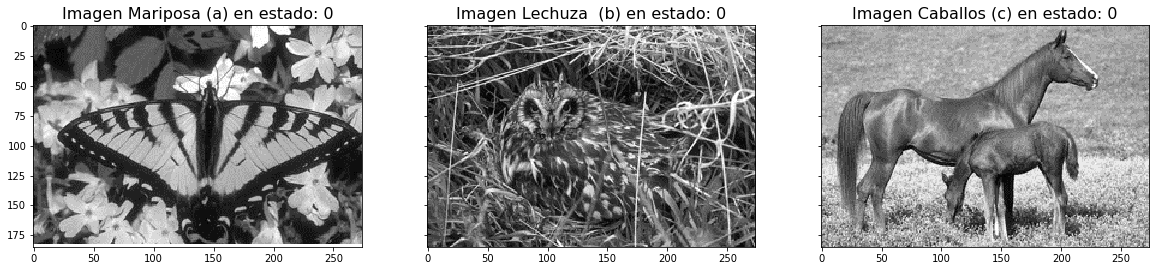

<<Imágenes tratadas en estado(s)>>
Estado[1]: Aplicando rescale_intensity desde el estado 0 al 1


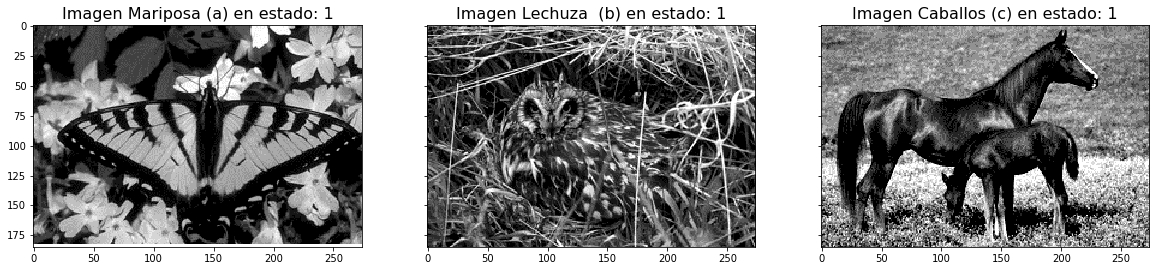

<<Imágenes tratadas en estado(s)>>
Estado[2]: Aplicando gaussian(sigma=4.3) desde el estado 0 al 2


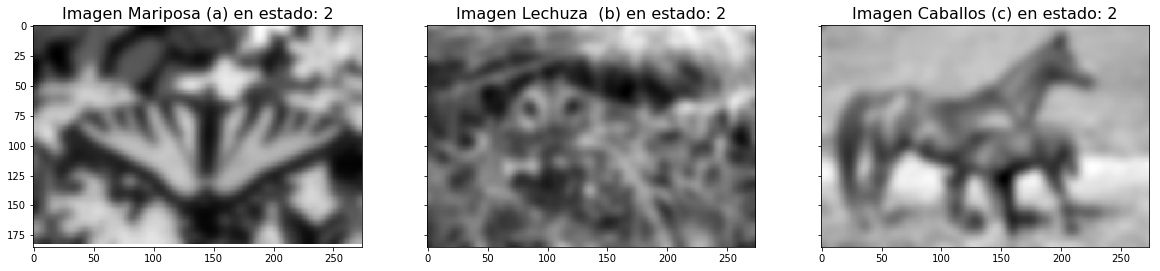

<<Imágenes tratadas en estado(s)>>
Estado[3]: Aplicando opening(disk(5)) desde el estado 2 al 3


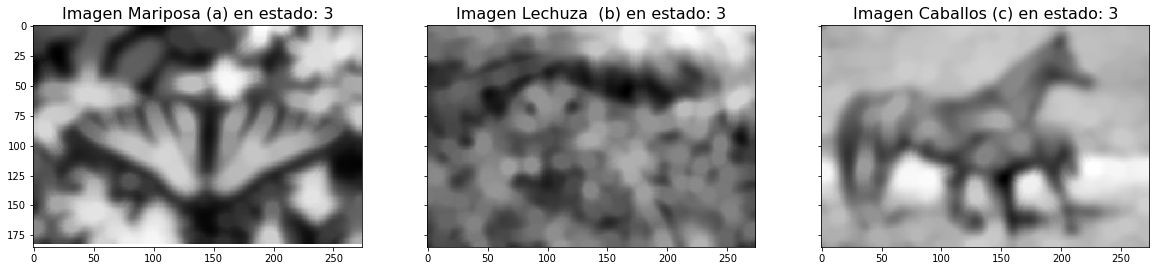

<<Imágenes tratadas en estado(s)>>
Estado[4]: Aplicando canny(sigma=1.0) desde el estado 3 al 4


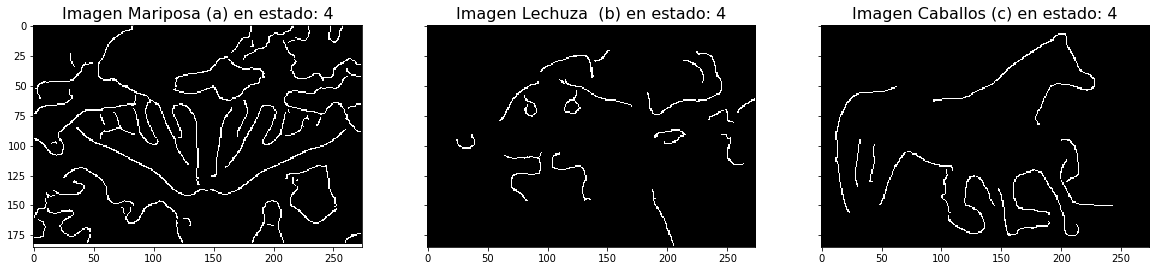

<<Imágenes tratadas en estado(s)>>
Estado[5]: Aplicando dilation(disk(1) desde el estado 4 al 5


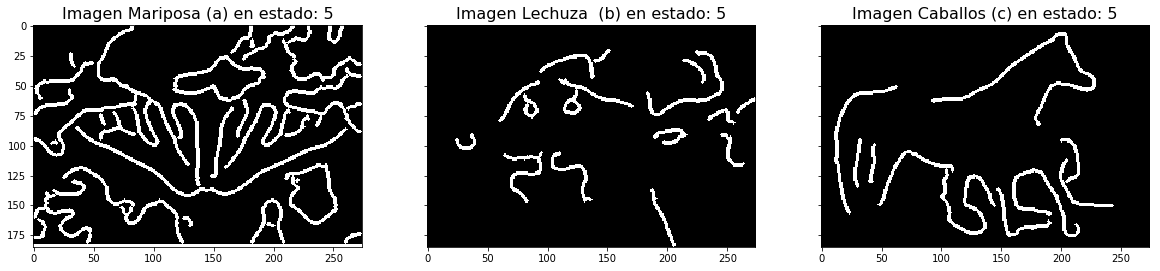

<<Imágenes tratadas en estado(s)>>
Estado[6]: Aplicando clear_border(buffer_size=5) desde el estado 5 al 6


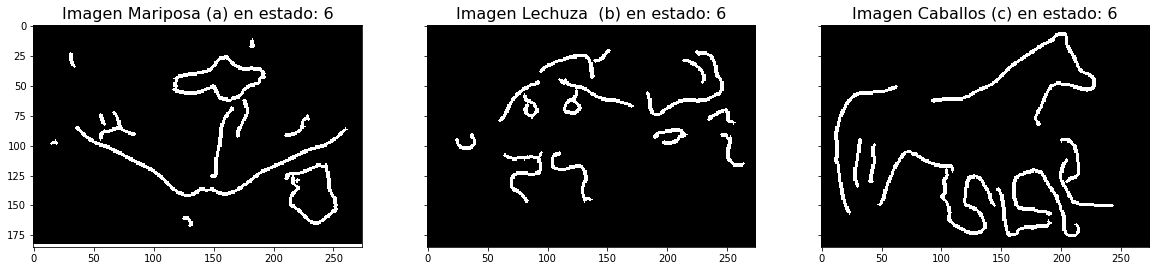

<<Imágenes tratadas en estado(s)>>
Estado[7]: Aplicando remove_small_objects(100) desde el estado 6 al 7


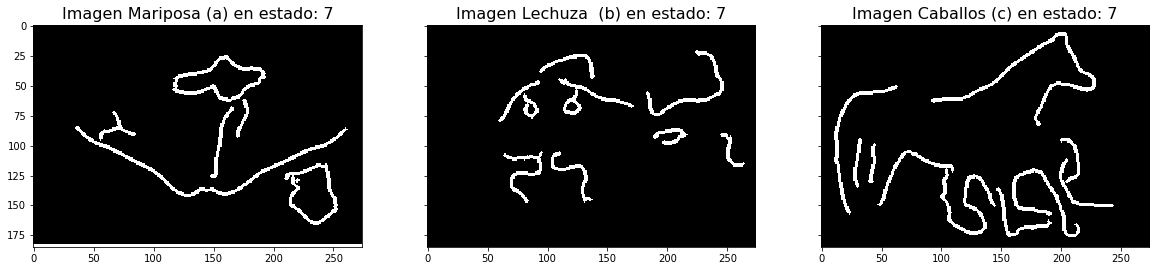

<<Imágenes tratadas en estado(s)>>
Estado[8]: Aplicando convex_hull_image desde el estado 7 al 8


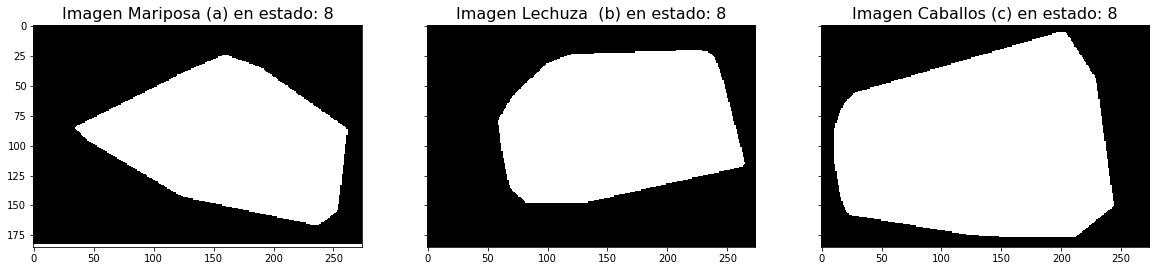

<<Imágenes tratadas en estado(s)>>
Estado[9]: Aplicando dilation(disk(6) desde el estado 8 al 9


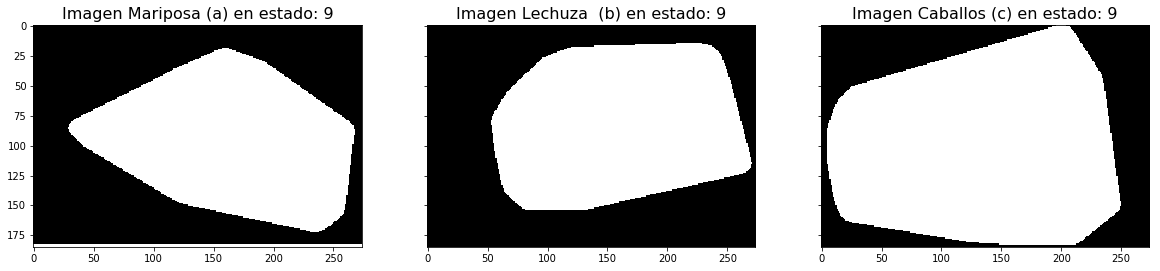

<<Imágenes tratadas en estado(s)>>
Estado[10]: Aplicando dilation(disk(1) desde el estado 9 al 10


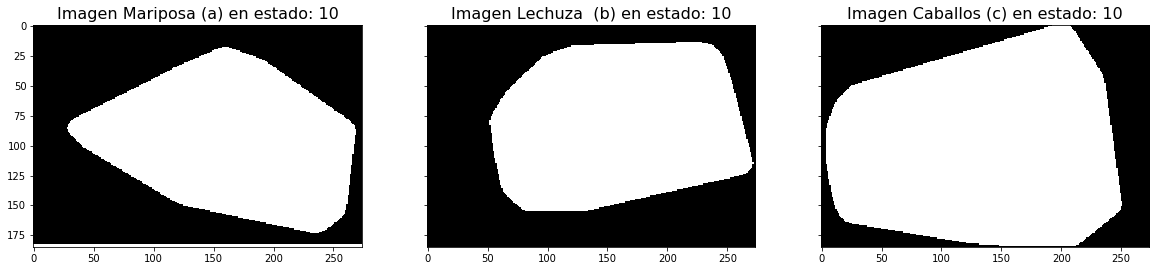

<<Imágenes tratadas en estado(s)>>
Estado[11]: Aplicando  ^ desde el estado 10 al 11


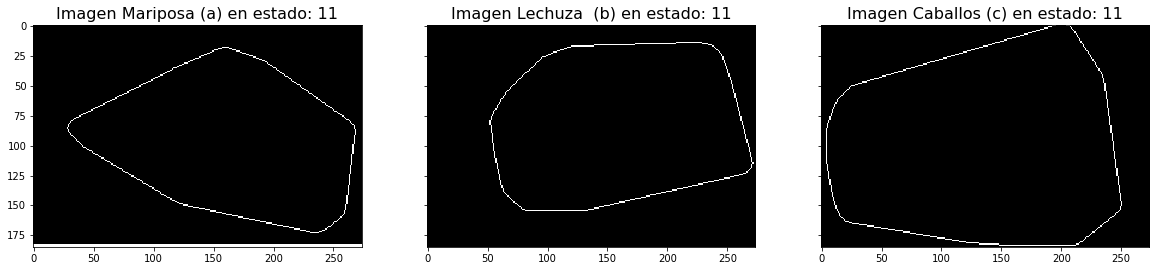

<<Imágenes tratadas en estado(s)>>
Estado[0]: Imágenes Originales Facilitadas


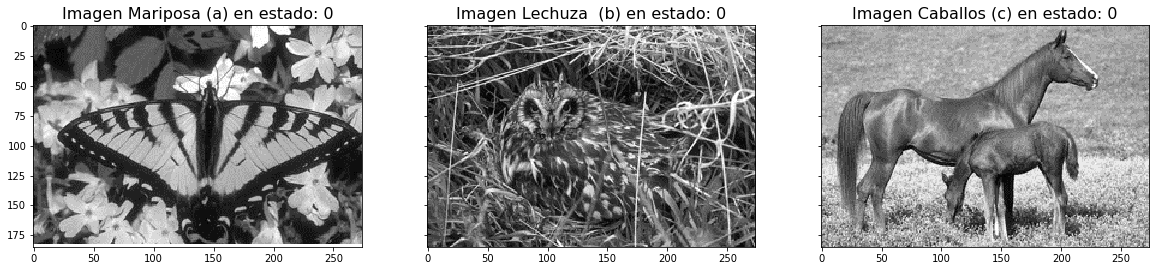

In [12]:
# Se inicializa el primer estado con las fotos originales
images = []; sta_ims = []; sta_des = []
ini_stated(images, sta_ims, sta_des)
now_sta = len(sta_ims) - 1

# Se aumenta el contraste 
now_sta = 0; n_images = []; n_images.clear()
for j in range(3):
    lowlim, uplim = np.percentile (sta_ims[now_sta][j], (10,99))
    n_images.append(exposure.rescale_intensity(sta_ims[now_sta][j], in_range=(lowlim,uplim)))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando rescale_intensity desde el estado %d al %d" % (now_sta, new_sta))

# Se aplica un filtro gaussiano con sigma=4.3
now_sta = 0; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(filters.gaussian(sta_ims[now_sta][j], sigma=4.3))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando gaussian(sigma=4.3) desde el estado %d al %d" % (now_sta, new_sta))

# Se aplica el operador morfológico "opening" con disk=5
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.opening(sta_ims[now_sta][j], morphology.disk(5)))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando opening(disk(5)) desde el estado %d al %d" % (now_sta, new_sta))

# Se aplica el Algoritmo de Canny con sigma=1.0
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(feature.canny(sta_ims[now_sta][j], sigma=1.0))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando canny(sigma=1.0) desde el estado %d al %d" % (now_sta, new_sta))


# Se aplica el Operador Morfológico de "dilatación" con disk=1.
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.dilation(sta_ims[now_sta][j], morphology.disk(1)))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando dilation(disk(1) desde el estado %d al %d" % (now_sta, new_sta))


''' ####Se comentan PRUEBAS al no obtener buenos resultados###
now_sta = len(sta_ims) - 1 ; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(ndi.binary_fill_holes(sta_ims[now_sta][j]))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando binary_fill_holes desde el estado %d al %d" % (now_sta, new_sta))
'''

# Se realiza una segmentación eliminado los objetos que estén a una distancia del borde inferior a '5'
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(segmentation.clear_border(sta_ims[now_sta][j], buffer_size=5))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando clear_border(buffer_size=5) desde el estado %d al %d" % (now_sta, new_sta))


'''####Se comentan PRUEBAS al no obtener buenos resultados###
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.remove_small_objects(sta_ims[now_sta][j], 200))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando remove_small_objects(200) desde el estado %d al %d" % (now_sta, new_sta))
'''

'''####Se comentan PRUEBAS al no obtener buenos resultados###
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.dilation(sta_ims[now_sta][j], morphology.disk(3)))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando dilation(disk(3) desde el estado %d al %d" % (now_sta, new_sta))
'''

# Se eliminan los objetos de la imagen con un tamaño inferior a "100"
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.remove_small_objects(sta_ims[now_sta][j], 100))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando remove_small_objects(100) desde el estado %d al %d" % (now_sta, new_sta))


# Se aplica convex_hull para obtener un polígono al estirar los puntos blancos extremos de la imagen
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.convex_hull_image(sta_ims[now_sta][j]))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando convex_hull_image desde el estado %d al %d" % (now_sta, new_sta))


# Se aplica el Operador Morfológico "dilatación" con disk=6
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.dilation(sta_ims[now_sta][j], morphology.disk(6)))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando dilation(disk(6) desde el estado %d al %d" % (now_sta, new_sta))


# Se aplica el Operador Morfológico "dilatación" con disk=1
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(morphology.dilation(sta_ims[now_sta][j], morphology.disk(1)))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando dilation(disk(1) desde el estado %d al %d" % (now_sta, new_sta))


# Se aplica "xor" de los dos últimos estados para obtener el contorno del polígono
# ("xor" nos devuelve uno para aquellos puntos en los que ambas imágenes difieren)
now_sta = len(sta_ims) - 1; n_images = []; n_images.clear()
for j in range(3):
    n_images.append(((sta_ims[now_sta][j]) ^ (sta_ims[now_sta - 1][j])))
sta_ims.append(n_images)
new_sta = len(sta_ims) - 1
sta_des.append("Aplicando  ^ desde el estado %d al %d" % (now_sta, new_sta))

# Mostrar todas las imágenes en sus distintos estados (desde el estado inicial con imágenes originales)
for j in range(new_sta + 1):
    show_states(sta_ims, sta_des, [j])
                                  
# Se finaliza mostrando de nuevo las imágenes originales para facilitar la comparación con resultados obtenidos        
show_states(sta_ims, sta_des, [0])


### Aplicación sobre las 3 imágenes del Contorno Activo con un "init" automático

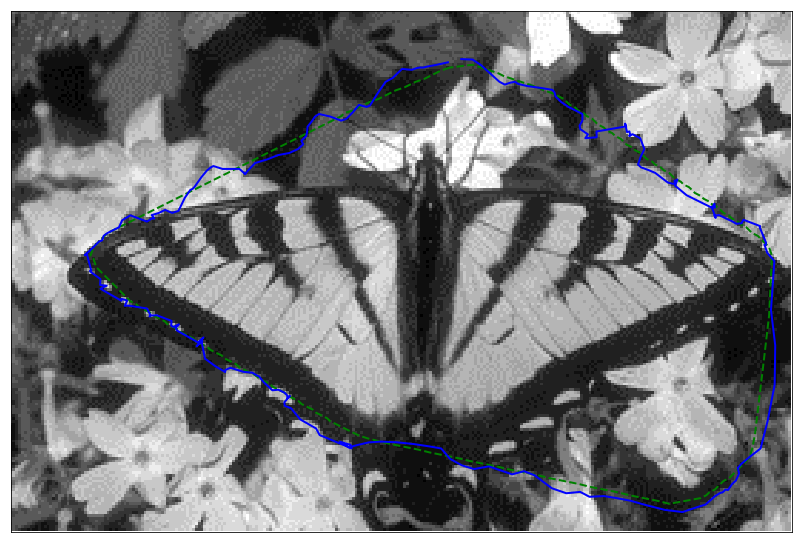

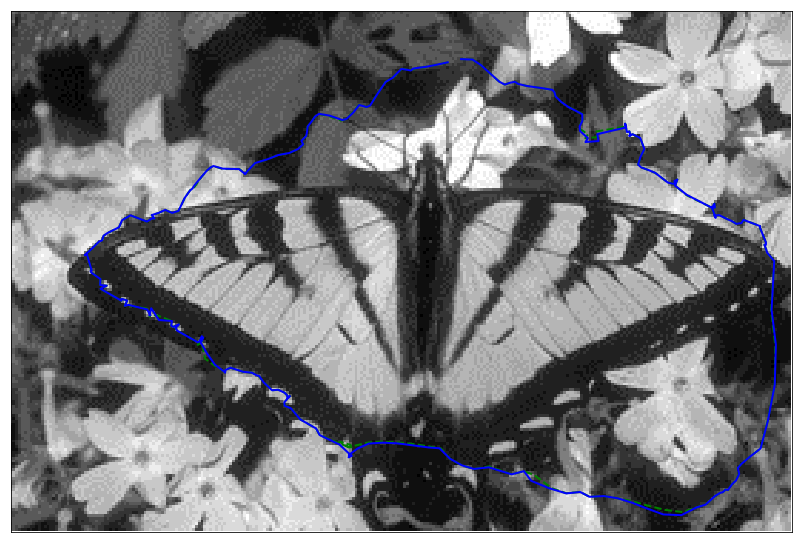

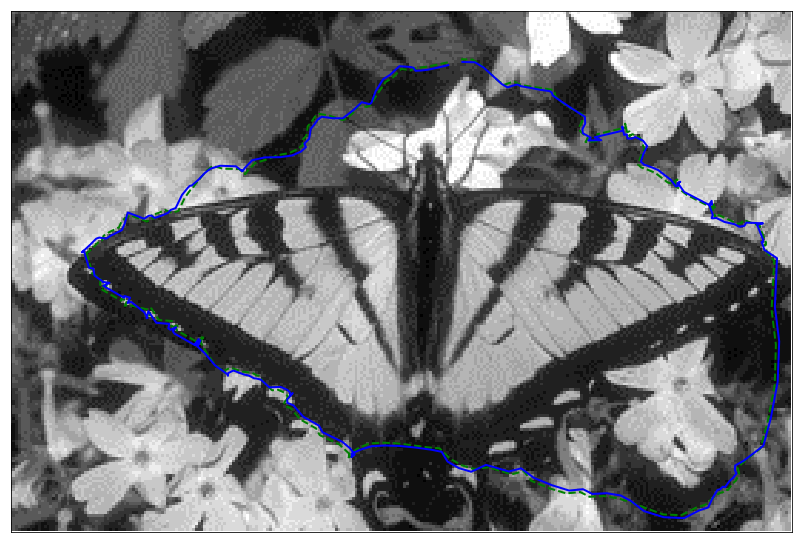

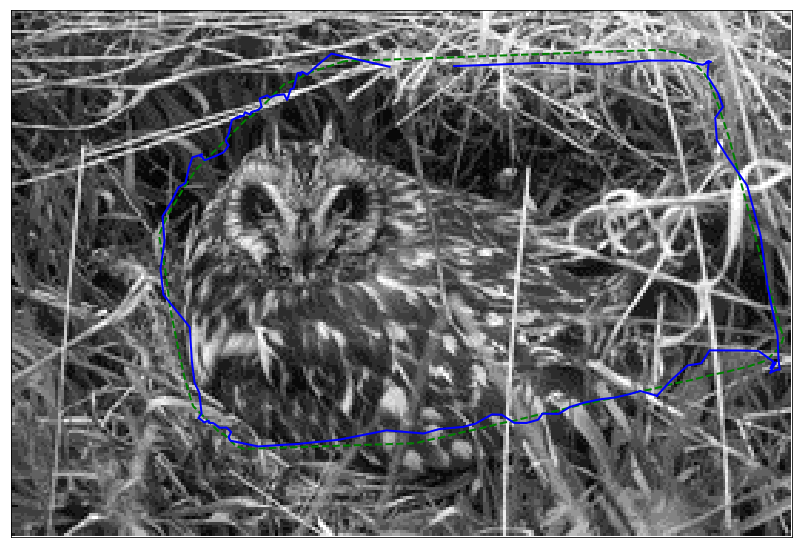

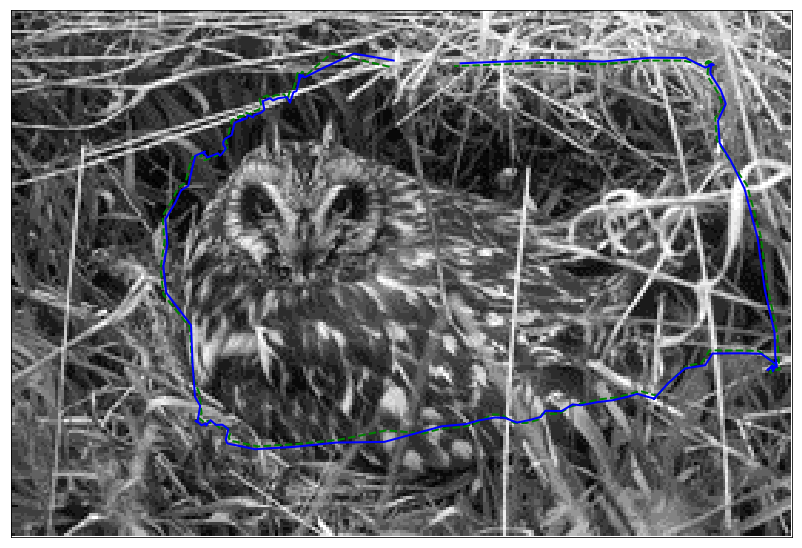

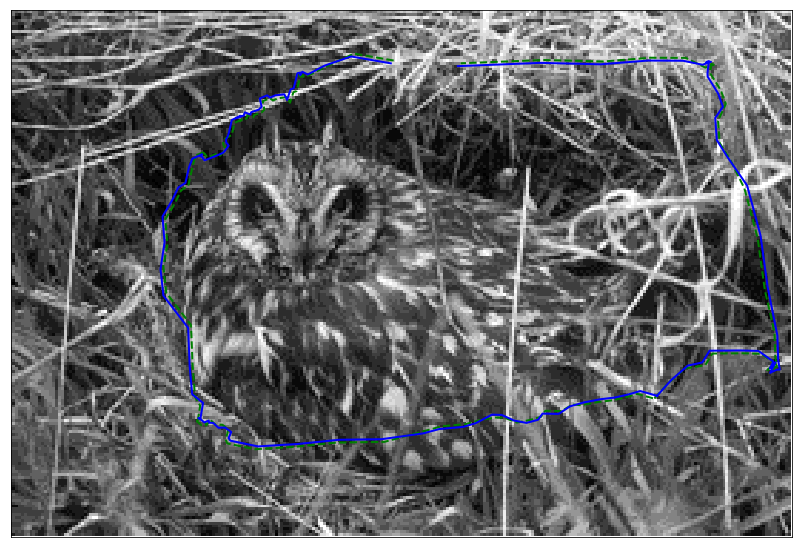

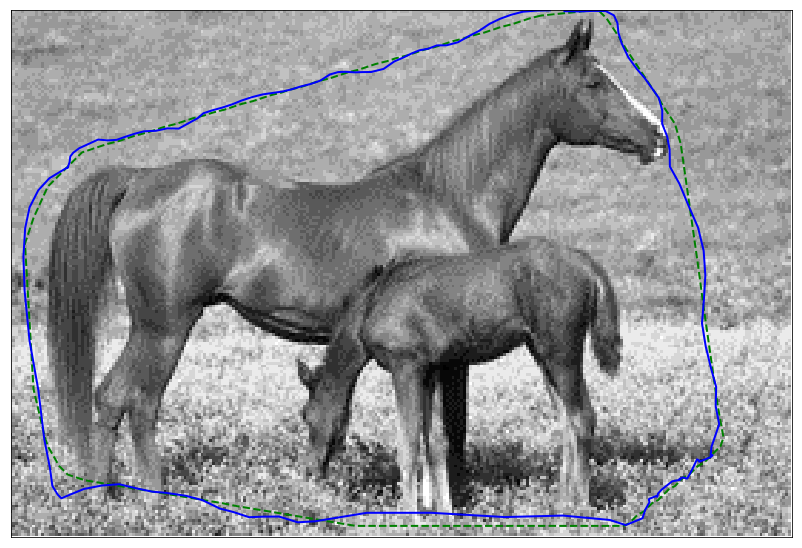

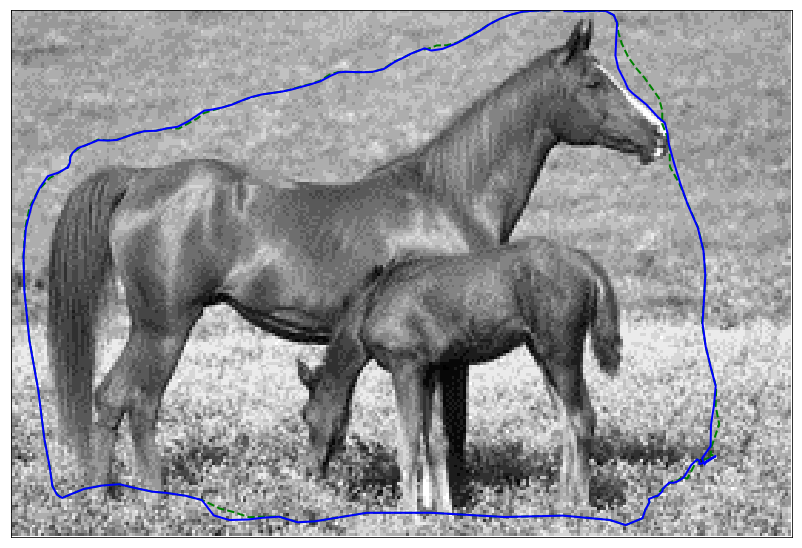

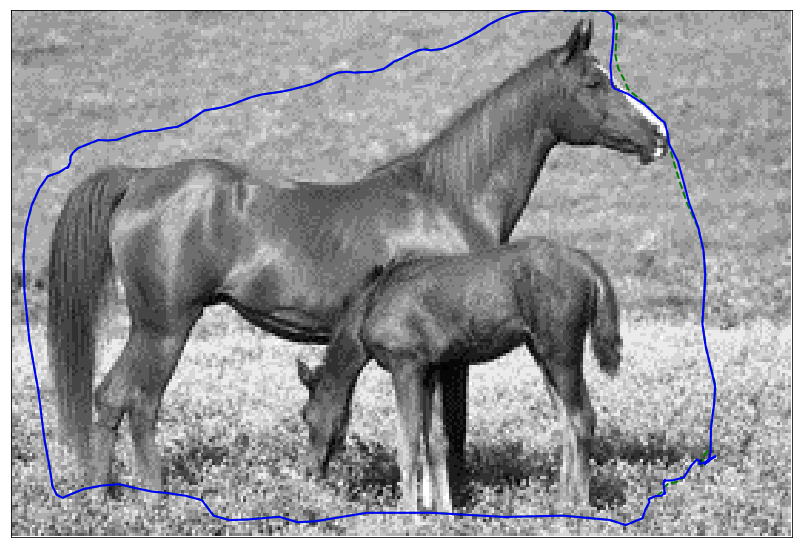

In [13]:
# Bucle para aplicar el contorno activo a las 3 imágenes
for j in range(3):
    # Obtener el contorno inicial de la imagen en curso de entre las 3 tratadas
    # Se utiliza la imagen obtenida en el último estado, correspondiente al contorno resultante tras 
    # realizar las diferentes operaciones realizadas (morfológicas, filtros, etc)
    init = get_init(sta_ims[new_sta][j])
    # Bucle para iterar sobre las imágenes obtenidas al aplicar el contorno activo
    # con el fin de verificar si sobre estas se mejoran los resultados
    # Vemos que se obtienen mejoras aunque no muy significativas
    for k in range(3):
        #img_acm = filters.gaussian(sta_ims[0][j], 7)  # si se desea aplicar el CA sobre las imágenes gaussianas        
        #img_acm = sta_ims[1][j] # si se desea aplicar el CA sobre las imágenes intensificadas
        img_acm = sta_ims[0][j] # si se desea aplicar el CA sobre las imágenes originales
        snake = segmentation.active_contour(img_acm, init, alpha=0.001, beta=0.01, gamma=0.01)
        plot_figure(sta_ims[0][j], snake, init)   
        init = snake


###  Conclusiones:

Para la determinación de contornos activos ha sido necesaria una fuerte carga de preprocesamiento.
Este preproceso, debido a que ha sido genérico para poder cumplir en tres imágenes muy diferentes entre sí, no se ha podido ajustar al detalle.
Aun así, ha cumplido todos los pasos necesarios:
Eliminación de detalles, mediante filtros gausianos y operadores morfológico de apertura y erosión.
Determinación de los bordes aplicando el filtro de detección "canny", y tratando estos bordes para crear una imagen lo más cerrada posible eliminando detalles (operador remove_small_objects) y amplificando otra vez operadores morfológicos como cierre, dilatación y erosión.
Con esta parte de la imagen lo mejor definida posible, se pasa a encerrar toda el objeto mediante un polígono de envolvente convexa, que creará un polígono alrededor de todos los bordes, y a partir del cual se podrá dar una forma de inicio ante la cual la "snake" del contorno activo pueda delimitar los bordes de la imagen original.

Otros casos de uso / Mejoras:

En este caso no se ha evaluado la necesidad de tratar diferentes contornos activos para objetos distintos dentro de una imagen.
En ese caso de uso en concreto, sería necesario un paso adicional tras preprocesar la imagen.
Este tratamiento adicional consistiría en la identificación de zonas mediante los algoritmos de etiquetamiento (skimage.measure.label) que nos permite separar las diferentes zonas, es decir, aquellas partes de la imagen que se comportan como islas. Una vez definidas estas etiquetas, se pueden evaluar sus propiedades (skimage.measure.regionprops) entra las que se encuentran el propio polígono de envolvente convexa, que podremos utilizar otra vez para definir las "snakes" pertinentes.

